<a href="https://colab.research.google.com/github/massinoLight/ProjetDataViz/blob/main/ProjetDataVizPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/imdevskp/corona-virus-report'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amassinnacerddine
Your Kaggle Key: ··········


  0%|          | 0.00/19.0M [00:00<?, ?B/s]

100%|██████████| 19.0M/19.0M [00:00<00:00, 49.9MB/s]


In [7]:
data_dir = './corona-virus-report'
import os
os.listdir(data_dir)

['full_grouped.csv',
 'usa_county_wise.csv',
 'worldometer_data.csv',
 'country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv']

In [8]:
import pandas as pd
covid_data = pd.read_csv(data_dir + '/country_wise_latest.csv')

In [9]:
covid_data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [2]:
!pip install --user git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-6u2f_y0n
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-6u2f_y0n
     |████████████████████████████████| 6.5MB 11.8MB/s 
     |████████████████████████████████| 225kB 54.4MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759571 sha256=649b1ed46b423608353a5aa70198b8c372082cf6573a8374d10e5d28f00be294
  Stored in directory: /tmp/pip-ephem-wheel-cache-2pfnsjxw/wheels/3f/f3/56/de548b66967d0d661612b7618022e2c0d4b86b9a638cf6ccf3
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=bd0699708476842632867205f346e012f87f6593d854a3914355e4be20436bcd
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built basemap pyshp
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


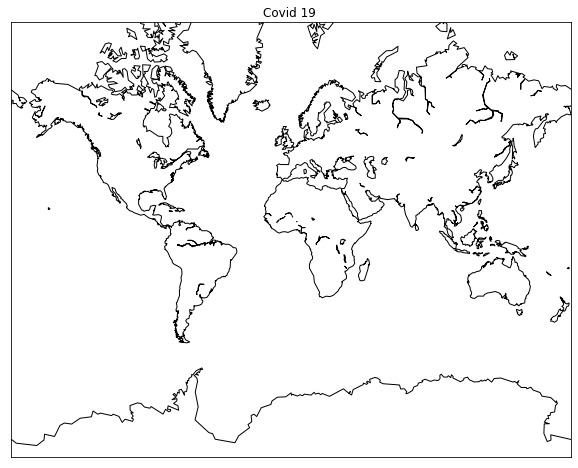

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
plt.title("Covid 19 ")
plt.show()


In [7]:
import opendatasets as od
country_dataset_url = 'https://www.kaggle.com/eidanch/counties-geographic-coordinates'
od.download(country_dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amassinnacerddine
Your Kaggle Key: ··········


100%|██████████| 5.09k/5.09k [00:00<00:00, 3.66MB/s]

In [9]:
country_data_dir = './counties-geographic-coordinates'
import os
os.listdir(country_data_dir)

['countries.csv']

In [10]:
import pandas as pd
country_data = pd.read_csv(country_data_dir + '/countries.csv')
country_data

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [17]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 8.9MB/s 
     |████████████████████████████████| 15.3MB 289kB/s 


In [19]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [26]:
df = pd.DataFrame(
    {
     'Country': country_data['name'],
     'Latitude': country_data['latitude'],
     'Longitude': country_data['longitude']
     })

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
gdf
print(gdf.head())



                Country   Latitude  Longitude                    geometry
0               Andorra  42.546245   1.601554    POINT (1.60155 42.54624)
1  United Arab Emirates  23.424076  53.847818   POINT (53.84782 23.42408)
2           Afghanistan  33.939110  67.709953   POINT (67.70995 33.93911)
3   Antigua and Barbuda  17.060816 -61.796428  POINT (-61.79643 17.06082)
4              Anguilla  18.220554 -63.068615  POINT (-63.06862 18.22055)


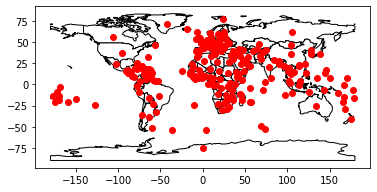

In [29]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [36]:
# Importing Libraries
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

from shapely.geometry import Point


df1 = pd.read_csv(country_data_dir + '/countries.csv')
df = df1.loc[:, ("name",  "country", "latitude", "longitude")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       245 non-null    object 
 1   country    244 non-null    object 
 2   latitude   244 non-null    float64
 3   longitude  244 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [40]:
geometry = geopandas.points_from_xy(df.longitude, df.latitude)
geo_df = geopandas.GeoDataFrame(df[['name','country', 'latitude', 'longitude']], geometry=geometry)

geo_df.head()

,name,country,latitude,longitude,geometry
0,Andorra,AD,42.546245,1.601554,POINT (1.60155 42.54624)
1,United Arab Emirates,AE,23.424076,53.847818,POINT (53.84782 23.42408)
2,Afghanistan,AF,33.939110,67.709953,POINT (67.70995 33.93911)
3,Antigua and Barbuda,AG,17.060816,-61.796428,POINT (-61.79643 17.06082)
4,Anguilla,AI,18.220554,-63.068615,POINT (-63.06862 18.22055)


In [22]:
import folium
from folium.plugins import MarkerCluster


m = folium.Map(location=[46.227638, 2.213749], zoom_start=3,min_zoom=3,max_zoom=5)

marker_cluster = MarkerCluster().add_to(m)


folium.Marker(
    location=[46.227638, 2.213749],
    popup="100000 morts",
    icon=folium.Icon(color="red", icon="remove-sign"),
).add_to(marker_cluster)

"""folium.Marker(
    location=[44.67, -73.94],
    popup="Add popup text here.",
    icon=folium.Icon(color="red", icon="ok-sign"),
).add_to(marker_cluster)

folium.Marker(
    location=[44.67, -71.94],
    popup="Add popup text here.",
    icon=None,
).add_to(marker_cluster)"""

m